Антонов Всеволод Владимирович

---



# Пайплайн

## Порядок сдачи домашнего

Под каждое домашнее вы создаете отдельную ветку куда вносите все изменения в рамках домашнего. Как только домашнее готово - создаете пулл реквест (обратите внимание что в пулл реквесте должны быть отражены все изменения в рамках домашнего). Ревьювера назначаете из таблицы - https://docs.google.com/spreadsheets/d/1vK6IgEqaqXniUJAQOOspiL_tx3EYTSXW1cUrMHAZFr8/edit?gid=0#gid=0
Перед сдачей проверьте код, напишите тесты. Не забудьте про PEP8, например, с помощью flake8. Задание нужно делать в jupyter notebook.

**Дедлайн - 7 октбяря 10:00**

Пайплайн — это серия шагов обработки данных, где вывод одного шага служит входом для следующего. Каждый шаг выполняет конкретную задачу, такую как фильтрация данных, преобразование форматов или выполнение вычислений. Пайплайны часто используются для упрощения и автоматизации сложных процессов, разбивая их на последовательные и управляемые этапы.

Где используются пайплайны?

**Обработка данных:** Пайплайны часто используются для обработки больших объемов данных. Например, в процессах ETL (Extract, Transform, Load) для извлечения данных из различных источников, их преобразования и загрузки в хранилище данных.

**Машинное обучение:** В машинном обучении пайплайны используются для последовательного выполнения шагов, таких как очистка данных, выбор признаков, обучение модели и оценка производительности.

**Разработка программного обеспечения:** В пайплайнах CI/CD (непрерывная интеграция/непрерывное развертывание) автоматизируются такие задачи, как сборка, тестирование и развертывание приложений, что ускоряет процесс разработки и повышает его надежность.

**Обработка изображений и видео:** Пайплайны помогают в обработке медиа-контента, выполняя такие задачи, как фильтрация, кодирование, декодирование и улучшение качества изображений или видео.

**Автоматизация бизнес-процессов:** В бизнесе пайплайны используются для автоматизации повторяющихся задач, таких как обработка заказов, управление запасами и бухгалтерский учет.

Использование пайплайнов делает процессы более управляемыми, модульными и масштабируемыми, что особенно важно при работе с большими объемами данных или сложными системами.

Мы попробуем создать собственный пайплайн в рамках нашего домашнего задания.

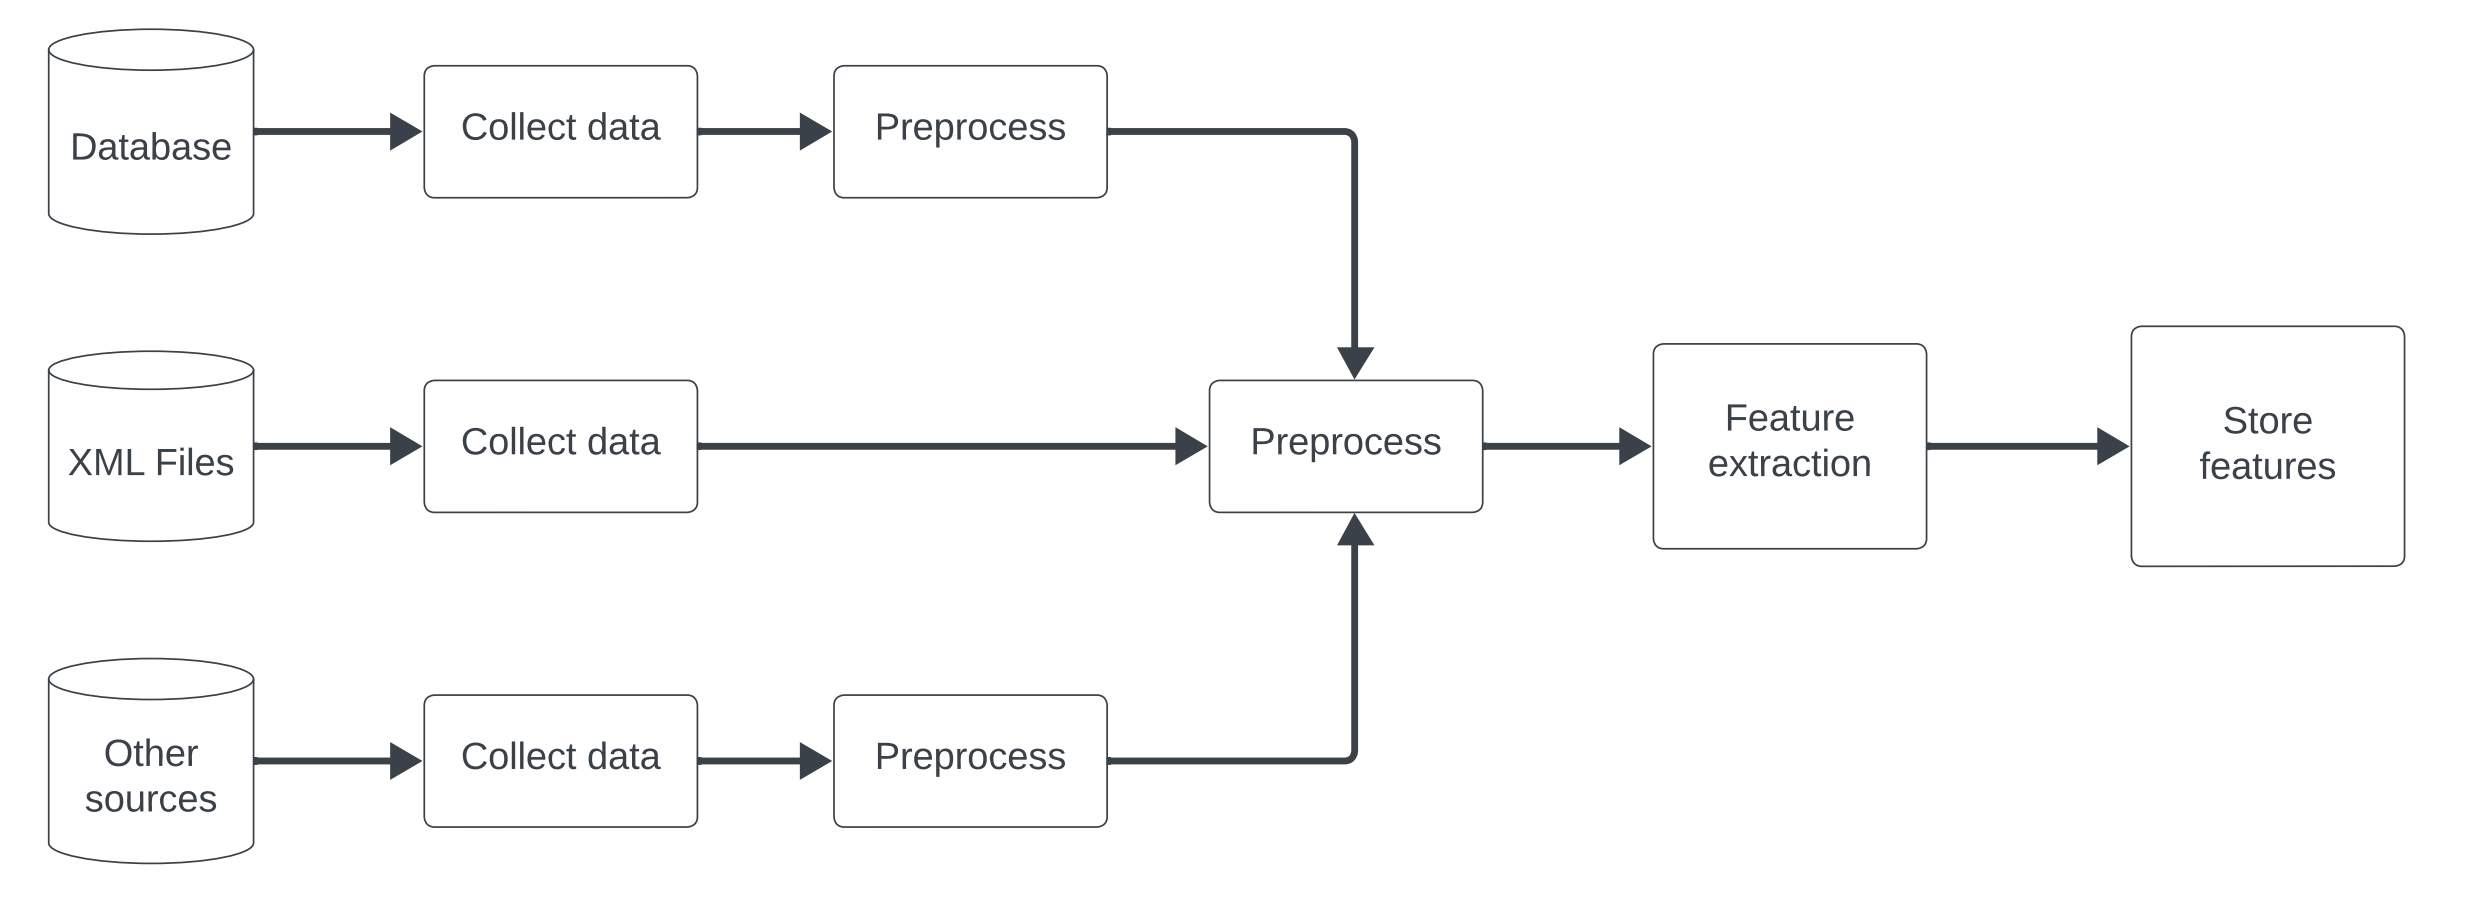

# Шаги
* Создание пайплайна
* Спецификация зависимостей
* Визуализация пайплайна
* Запуск зависимостей

# Создание пайплайна

Описание пайплайна состоит из набора шагов. Такие шаги могут быть ответственны за различные задачи, начиная с компиляции кода и заканчивая запуском базы данных. В этом домашнем задании мы создаем прототип, поэтому наши шаги будут функциями. Мы будем предполагать, что все функции не имеют аргументов и ничего не возвращают для упрощения.

Напишите функцию `pipeline`, которая возвращает декоратор `step`. С помощью этого декоратора `step` вы сможете зарегистрировать функцию как шаг пайплайна.

In [ ]:
def pipeline():
    steps = []

    def step(func):
        steps.append(func.__name__)

    step.get_all = lambda: steps
    return step


step = pipeline()

In [2]:
@step
def collect_data():
    print("collect data")


@step
def preprocess_data():
    print("preprocess data")

Список всех имен шагов, в порядке их объявления в модуле, должен быть доступен через метод `get_all` декоратора `step`.

In [3]:
step.get_all()
#['collect_data', 'preprocess_data']

['collect_data', 'preprocess_data']

# Спецификация зависимостей

Шаг пайплайна может зависеть от другого шага. Например, чтобы предварительно обработать данные, их сначала нужно собрать. Давайте добавим возможность указывать, от каких шагов зависят текущие.

In [4]:
import functools


def pipeline():
    steps = []
    dependencies = {}

    def step(func=None, *, depends_on=[]):
        if func is None:
            def decorator(func):
                return step(func, depends_on=depends_on)

            return decorator

        @functools.wraps(func)
        def inner(*args, **kwargs):
            return func(*args, **kwargs)

        steps.append(func.__name__)
        dependencies[func.__name__] = depends_on
        inner.get_dependencies = lambda: dependencies[func.__name__]
        return inner

    step.get_all = lambda: steps
    return step


step = pipeline()

In [19]:
@step
def collect_data():
    print("collect data")


@step(depends_on=["collect_data"])
def preprocess_data():
    print("preprocess data")

Давайте реализуем функцию `get_dependencies`, которая позволит возвращать имена всех функций, от которых она зависит.

In [7]:
collect_data.get_dependencies()
#[]

[]

In [8]:
preprocess_data.get_dependencies()
#['collect_data']

['collect_data']

# Визуализация пайплайна

Обратите внимание, что наш пайплайн образует граф зависимостей. Вершины графа будут ступенями пайплайна; ребро соединяет вершины, если один шаг зависит от другого

In [9]:
"collect_data" in preprocess_data.get_dependencies()
# True

True

Попробуем визуализировать наш граф!

**Graphviz** — это инструмент для визуализации графов и сетевых структур. Он позволяет создавать диаграммы, представляя данные в виде узлов и связей между ними. В Python для работы с Graphviz существует специальная библиотека `graphviz`, которая предоставляет удобный интерфейс для создания и рендеринга графов.

Для начала работы с Graphviz в Python необходимо установить библиотеку. Это можно сделать с помощью `pip`:

```bash
pip install graphviz
```

Также необходимо убедиться, что установлен сам Graphviz. Его можно установить через менеджеры пакетов в зависимости от операционной системы:

- **macOS**:  
  ```bash
  brew install graphviz
  ```
- **Ubuntu**:  
  ```bash
  sudo apt-get install graphviz
  ```
- **Windows**:  
  Скачать с официального сайта: https://graphviz.org/download/

Пример работы с пакетом `graphviz`:

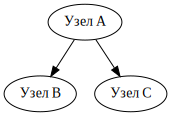

In [10]:
from graphviz import Digraph

dot = Digraph(comment='Пример графа')
dot.node('A', 'Узел A')
dot.node('B', 'Узел B')
dot.node('C', 'Узел C')

dot.edges(['AB', 'AC'])

dot

Добавьте метод `graph` к `step`, которая будет возвращать граф зависимостей (экземляр класса `Digraph`).

In [17]:
import functools


def pipeline():
    steps = []
    dependencies = {}

    def step(func=None, *, depends_on=[]):
        if func is None:
            def decorator(func):
                return step(func, depends_on=depends_on)

            return decorator

        @functools.wraps(func)
        def inner(*args, **kwargs):
            return func(*args, **kwargs)

        steps.append(func.__name__)
        dependencies[func.__name__] = depends_on
        inner.get_dependencies = lambda: dependencies[func.__name__]
        return inner

    step.get_all = lambda: steps

    def graph():
        dep_graph = Digraph()
        for i in range(len(steps)):
            index = chr(i + 65)
            label = steps[i]
            dep_graph.node(index, label)
        dep_edges = []
        for k in dependencies.keys():
            for v in dependencies[k]:
                main_index = chr(steps.index(v) + 65)
                dep_index = chr(steps.index(k) + 65)
                dep_edges.append(main_index + dep_index)
        dep_graph.edges(dep_edges)
        return dep_graph

    step.graph = graph
    return step


step = pipeline()

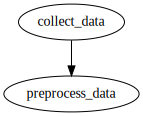

In [20]:
# не забыть запустить объявления функций выше или ниже
step.graph()

# Запуск зависимостей

Измените логику выполнения зарегистрированных шагов так, чтобы перед выполнением шага все его зависимости выполнялись сначала в **обратном топологическом порядке сортировки**. Для шагов без зависимостей логика выполнения должна оставаться прежней.

In [36]:
import functools


def pipeline():
    steps = []
    dependencies = {}
    funcs = {}

    def step(func=None, *, depends_on=[]):
        if func is None:
            def decorator(func):
                return step(func, depends_on=depends_on)

            return decorator

        @functools.wraps(func)
        def inner(*args, **kwargs):
            visited = set()
            res = []

            def dfs(v):
                visited.add(v)
                for u in dependencies[v]:
                    if not u in visited:
                        dfs(u)
                res.append(v)

            dfs(func.__name__)
            for i in range(len(res) - 1):
                funcs[res[i]]()
            return func(*args, **kwargs)

        steps.append(func.__name__)
        dependencies[func.__name__] = depends_on
        funcs[func.__name__] = func
        inner.get_dependencies = lambda: dependencies[func.__name__]
        return inner

    step.get_all = lambda: steps

    def graph():
        dep_graph = Digraph()
        for i in range(len(steps)):
            index = chr(i + 65)
            label = steps[i]
            dep_graph.node(index, label)
        dep_edges = []
        for k in dependencies.keys():
            for v in dependencies[k]:
                main_index = chr(steps.index(v) + 65)
                dep_index = chr(steps.index(k) + 65)
                dep_edges.append(main_index + dep_index)
        dep_graph.edges(dep_edges)
        return dep_graph

    step.graph = graph
    return step


step = pipeline()

In [37]:
collect_data()
#collect data

collect data


In [38]:
preprocess_data()
#collect data
#preprocess data

collect data
preprocess data


Обратите внимание, что все зависимости должны отработать один раз.

In [39]:
step = pipeline()


@step
def collect_data():
    print("collect data")


@step(depends_on=["collect_data"])
def preprocess_data():
    print("preprocess data")


@step(depends_on=["collect_data"])
def modify_data():
    print("modify data")


@step(depends_on=["modify_data"])
def extract_features():
    print("extract features")


@step(depends_on=["extract_features"])
def filter_features():
    print("filter features")


@step(depends_on=["preprocess_data", "modify_data"])
def merge_data():
    print("merge data")


@step(depends_on=["merge_data", "filter_features"])
def handle_data():
    print("handle data")


filter_features()
#collect data
#modify data
#extract features
#filter features

collect data
modify data
extract features
filter features


In [40]:
handle_data()
#collect data
#preprocess data
#modify data
#merge data
#extract features
#filter features
#handle data

collect data
preprocess data
modify data
merge data
extract features
filter features
handle data


Поздаравляю, определить порядок зависимостей пайплайна теперь для нас не проблема!